In [1]:
from IPython.core.display import HTML
with open('../style.css', 'r') as f:
    css = f.read()
HTML(css)

# Memoization

This notebook discusses the technique of [https://en.wikipedia.org/wiki/Memoization](memoization) via the Fibonacci numbers.
The [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) $F_n$ are defined inductively for all $n\in\mathbb{N}$:
- $F_= := 0$,
- $F_1 := 1$, and
- $F_{n+2} := F_{n+1} + F_n$ for all $n \in \mathbb{N}$.

The function `fib` takes a natural number $n$ as argument. The expression $\texttt{fib}(n)$ computes the $n$-th *Fibonacci number* $F_n$ in a naive way.

In [2]:
def fib(n):
    if n < 2:
        return n
    return fib(n-2) + fib(n-1)

The problem with this definition of the function `fib` is that in order to compute e.g. $F_5$ we compute both $F_4$ and $F_3$.  However, in order to compute $F_4$, we compute $F_3$ and $F_2$.  Hence $F_3$ is computed twice.  Even worse, $F_2$ is computed twice for the two computations of $F_3$ and then it is also computed when computing $F_4$.  Hence, it is computed a total of $3$ times.  In general, it can be shown that when the above definition of `fib` is used to compute $F_n$, the number of times that $F_2$ needs to be computed grows as $\mathcal{O}\bigl(\phi^n\bigr)$ where $\phi = \frac{1}{2}\cdot\bigl(1 + \sqrt{5}\bigr)$.

In [3]:
import time

In [4]:
N  = 35
Ns = []
Ts = []
for n in range(1, N):
    start = time.time()
    Fn    = fib(n)
    stop  = time.time()
    print(f'elapsed time: {"{:.2e}".format(stop-start)}, fib({n}) = {Fn}')
    Ns.append(n)
    Ts.append(stop - start)

elapsed time: 9.54e-07, fib(1) = 1
elapsed time: 7.15e-07, fib(2) = 1
elapsed time: 9.54e-07, fib(3) = 2
elapsed time: 1.67e-06, fib(4) = 3
elapsed time: 2.15e-06, fib(5) = 5
elapsed time: 3.10e-06, fib(6) = 8
elapsed time: 5.25e-06, fib(7) = 13
elapsed time: 6.91e-06, fib(8) = 21
elapsed time: 1.22e-05, fib(9) = 34
elapsed time: 3.10e-05, fib(10) = 55
elapsed time: 5.60e-05, fib(11) = 89
elapsed time: 7.41e-05, fib(12) = 144
elapsed time: 9.80e-05, fib(13) = 233
elapsed time: 1.38e-04, fib(14) = 377
elapsed time: 2.40e-04, fib(15) = 610
elapsed time: 3.84e-04, fib(16) = 987
elapsed time: 5.15e-04, fib(17) = 1597
elapsed time: 7.99e-04, fib(18) = 2584
elapsed time: 1.30e-03, fib(19) = 4181
elapsed time: 2.19e-03, fib(20) = 6765
elapsed time: 4.15e-03, fib(21) = 10946
elapsed time: 8.11e-03, fib(22) = 17711
elapsed time: 9.03e-03, fib(23) = 28657
elapsed time: 1.45e-02, fib(24) = 46368
elapsed time: 2.30e-02, fib(25) = 75025
elapsed time: 3.82e-02, fib(26) = 121393
elapsed time: 6.09e-0

Let us plot the times.

In [5]:
import matplotlib.pyplot as plt 

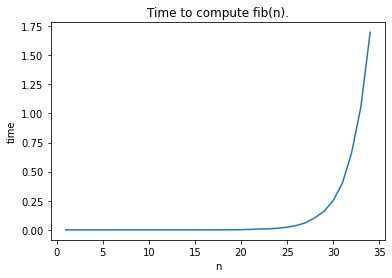

In [6]:
plt.plot(Ns, Ts)
plt.xlabel('n')
plt.ylabel('time')
plt.title('Time to compute fib(n).')
plt.show()

In order to verify that the running times are increasing exponentially, we plot the logarithms of the times.

In [7]:
import math

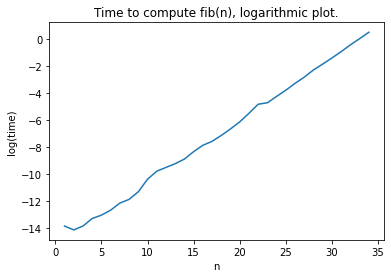

In [8]:
LogTs = [math.log(t) for t in Ts]
plt.plot(Ns, LogTs)
plt.xlabel('n')
plt.ylabel('log(time)')
plt.title('Time to compute fib(n), logarithmic plot.')
plt.show()

In [9]:
for n in range(1, N-1):
    print(Ts[n]/Ts[n-1])

0.75
1.3333333333333333
1.75
1.2857142857142858
1.4444444444444444
1.6923076923076923
1.3181818181818181
1.7586206896551724
2.549019607843137
1.8076923076923077
1.323404255319149
1.3215434083601285
1.4087591240875912
1.7374784110535406
1.6013916500994037
1.3401613904407201
1.5521074571560909
1.624589674723963
1.6866274797942689
1.8967545197124809
1.9536632981166744
1.1126524614254225
1.6076919013154418
1.584927050473186
1.6593686829419998
1.595748136764311
1.7046975136337121
1.5427961858918418
1.5763803813399744
1.6001841368467273
1.6472503329719868
1.5896907260813447
1.603452592543015


Compare these ratios with the [golden ratio](https://en.wikipedia.org/wiki/Golden_ratio) 
$\phi = \frac{1}{2}\cdot\bigl(1 + \sqrt{5}\bigr)$:  

In [10]:
print((1+math.sqrt(5)) / 2)

1.618033988749895


The function `memoize` takes a function `f` as its argument.  It returns a <em style="color:blue">memoized</em> version of the function `f`.  This memoized version will store all results in a cache and look them up instead of recomputing them.  

Note that the function object `f_memoized` that is returned by the function `memoize` is a so called 
[closure](https://en.wikipedia.org/wiki/Closure_(computer_programming)).  The reason is that the variable
`Cache`, which is created in the scope where `f_memoized` is defined, is stored inside the function object
`f_memoized`.

In [11]:
def memoize(f):
    Cache = {}
    
    def f_memoized(*args):
        if (f, args) in Cache:
            return Cache[(f, args)]
        result = f(*args)
        Cache[(f, args)] = result
        return result
    
    return f_memoized

In [12]:
fib = memoize(fib)

Let's plot the times of the *memoized* version of `fib`.  This time, there should be no exponential increase.

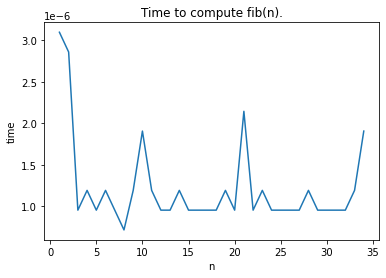

In [13]:
N  = 35
Ns = []
Ts = []
for n in range(1, N):
    start = time.time()
    Fn    = fib(n)
    stop  = time.time()
    Ns.append(n)
    Ts.append(stop - start)
    
plt.plot(Ns, Ts)
plt.xlabel('n')
plt.ylabel('time')
plt.title('Time to compute fib(n).')
plt.show()

We can achieve the same effect using a decorator:

In [14]:
@memoize
def fib2(n):
    if n < 2:
        return n
    return fib2(n-2) + fib2(n-1)

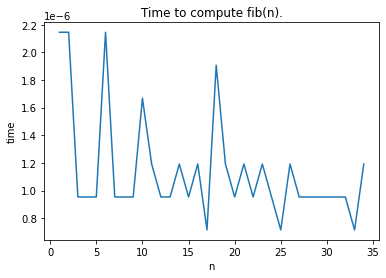

In [15]:
N  = 35
Ns = []
Ts = []
for n in range(1, N):
    start = time.time()
    Fn    = fib2(n)
    stop  = time.time()
    Ns.append(n)
    Ts.append(stop - start)
    
plt.plot(Ns, Ts)
plt.xlabel('n')
plt.ylabel('time')
plt.title('Time to compute fib(n).')
plt.show()

Since `fib2` is a *closure*, the dictionary `Cache` is stored inside `fib2`.  We can even inspect this dictionary manually.

In [ ]:
fib2.__closure__[0].cell_contents